In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import optimize as opt

# Funktionen implementieren

Wie auf dem Zettel vorgerechnet ergibt sich als Gleichung:

$\Large \int_{Z_{0,1}(\epsilon_n)}^{Z_{0,1}(\epsilon_n)} \sqrt{\epsilon_n - 16 \cdot (1 - e^{-z})^2} dz \overset{!}{=}  \pi \cdot \left( n + \frac{1}{2} \right)$

Dabei sind $Z_{0,1}$ und $Z_{0,2}$ gegeben durch:

$ -log \left( 1 \pm \sqrt{\frac{\epsilon_n}{16}}\right)$

In [2]:
def integrand(z,E): #numerisch zu integrierende Funktion
    return np.sqrt(E-16*(1-np.exp(-z))**2)

In [3]:
def upper_bound(E): #obere Integralgrenze
    return -1*np.log(1-np.sqrt(E/16))

In [4]:
def lower_bound(E): #untere Integralgrenze
    return -1*np.log(1+np.sqrt(E/16))

In [5]:
def potential(z): #Morse-Potential
    return 16*(1-np.exp(-z))**2

In [6]:
def nst(f,a,b,e=0.000001,max_iter=1000): #Bestimmung der NST via Intervallschachtelung
    if(abs(f(a))<e): #Prüfe zunächst, ob ober- oder Untergrenze bereits NST ist.
        return a
    if(abs(f(b))<e): 
        return b
    if((f(a)<0 and f(b)<0 or (f(a)>0 and f(b)>0))):  #Prüfe, ob Vorzeichenwechsel von f stattfindet
        raise ValueError("No or more than one root found.")
    elif(f(a)<0): 
        upper, lower = b,a
    else: 
        upper, lower = a,b
    
    n=0
    while(n < max_iter):     #Intervallschachtelung
        m=(upper+lower)/2
        if(f(m)<0):
            lower=m
        elif(f(m)>0):
            upper=m
        else: return m
        
        if(abs(f(upper)) < e):
            return upper
        if(abs(f(lower)) < e):
            return lower
        
        n += 1
    raise StopIteration("Nullstelle nach " + str(max_iter) + " Iterationen nicht gefunden.") 
    #Abbruch für zu viele Iterationen

In [7]:
def num_integrate(f, a, b, n=10**5):  # Numerische Integration via Obersumme
    int=0.0;
    for i in range(1, n):
        int+=(f(a+i*(b-a)/n)*(b-a)/n)
    return int    

In [8]:
def generate_eigenvalues_scipy(upper_eigenvalue):  #bestimmung des Integrals mittels bereits impl. Fkt. in Scipy
    eigenvalues = [] # Liste mit den bestimmten Eigenwerten
    # Bereich in dem die Nullstelle bestimmt werden soll
    upper_root = 15.999999999999999 # Für höhere Werte divergiert das Integral
    lower_root = 0.01 # Wenn die untere Grenze auf 0 gesetzt wird, wird als Lösung immer 0 ausgegeben
    # Durchlaufen der n, bis upper_eigenvalue erreicht ist
    for n in range(0,upper_eigenvalue):
        # convertiere das integral in eine aufrufbare funktion, die nur noch von der Energie abhängt
        final_equation = lambda E: integrate.quad(lambda x: integrand(x,E),lower_bound(E),upper_bound(E))[0]-np.pi*(0.5+n)
        eigenvalues.append(opt.brentq(final_equation,lower_root,upper_root))
    return eigenvalues

In [9]:
def generate_eigenvalues(upper_eigenvalue): # Bestimmung des Integrals mit oben definierten Funktionen
    eigenvalues = [] # Liste mit den bestimmten Eigenwerten
    # Bereich in dem die Nullstelle bestimmt werden soll
    upper_root = 15.999999999999999 # Für höhere Werte divergiert das Integral
    lower_root = 0.01 # Wenn die untere Grenze auf 0 gesetzt wird, wird als Lösung immer 0 ausgegeben
    # Durchlaufen der n, bis upper_eigenvalue erreicht ist
    for n in range(0,upper_eigenvalue):
        # convertiere das integral in eine aufrufbare funktion, die nur noch von der Energie abhängt
        final_equation = lambda E: num_integrate(lambda x: integrand(x,E),lower_bound(E),upper_bound(E), 10000)-np.pi*(0.5+n)
        eigenvalues.append(nst(final_equation,lower_root,upper_root))
    return eigenvalues

In [10]:
liste = generate_eigenvalues(4)

In [11]:
liste

[3.7500049376487725, 9.75001006603241, 13.750010943412782, 15.750007569789886]

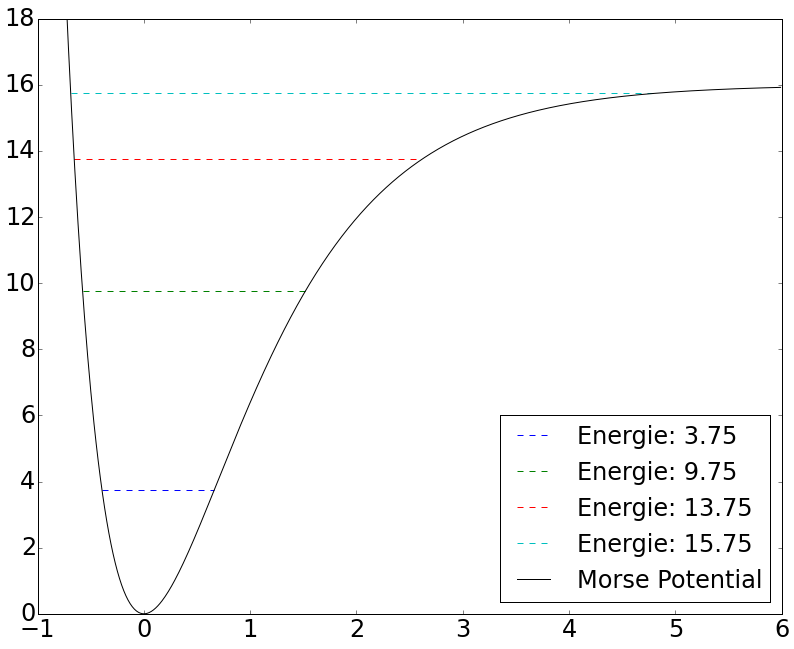

In [12]:
%matplotlib inline 
#Plotting der Energiewerte
plt.rcParams['figure.figsize'] = (20.0/1.5, 16.0/1.5)

for i in liste:
    xs = np.arange(lower_bound(i),upper_bound(i),0.01)
    plt.plot(xs,xs/xs*i,'--',label="Energie: " + str(round(i,4)))
xs = np.arange(-1,6,0.01)
plt.plot(xs,potential(xs),'k',label="Morse Potential")

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim([-1,6])
plt.ylim([0,18])

plt.legend(loc='best', fontsize=24)
plt.show()